<a href="https://colab.research.google.com/github/Christian-F-Badillo/NLP_challenge_MeIA/blob/main/Copy_of_NLP_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Challenge

Proyect for the NLP Challenge by [MeIA](https://www.taller-tic.redmacro.unam.mx/MeIA/)

Github Repository: [https://github.com/Christian-F-Badillo/NLP_challenge_MeIA](https://github.com/Christian-F-Badillo/NLP_challenge_MeIA)

> Authors: [Christian Badillo](mailto:cris.badillo1408@gmail.com),

## Preprocessing

### Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Data

In [3]:
# Load Data from Github in CSV UTF-8 format
url = "https://raw.githubusercontent.com/Christian-F-Badillo/NLP_challenge_MeIA/main/MeIA_Rest_Mex_Sentiment_Analysis_2023_Train.csv"
data = pd.read_csv(url)

In [4]:
# First fiftenn observations.
data.head(15)

,Review,Class,Unnamed: 2,Unnamed: 3
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0,NaN,NaN
1,"yo estaba tan emocionada de este viaje, pero t...",1.0,NaN,NaN
2,Este hotel es un engaño. De cuatro estrellas n...,1.0,NaN,NaN
3,La ducha se inundo completamente a los 5 min ...,1.0,NaN,NaN
4,Decidimos alquilar un taxi por un día para ir ...,1.0,NaN,NaN
5,Pasamos cuatro noches en este hotel (habitac 7...,1.0,NaN,NaN
6,"No me he alojado en este hotel, pero se recome...",1.0,NaN,NaN
7,"Muy mala atencion, entramos a beber algo y as...",1.0,NaN,NaN
8,"Así que volví como he dicho. El hotel, que for...",1.0,NaN,NaN
9,"La ciudad es bonita, pero la gente deja muchis...",1.0,NaN,NaN


In [5]:
# General Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21727 entries, 0 to 21726
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      17500 non-null  object 
 1   Class       17500 non-null  float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 679.1+ KB


### Data Cleaning

In [6]:
# Drop Empty Columns
data.drop(["Unnamed: 2", "Unnamed: 3"], inplace = True, axis = 1)
data.head()

,Review,Class
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0
1,"yo estaba tan emocionada de este viaje, pero t...",1.0
2,Este hotel es un engaño. De cuatro estrellas n...,1.0
3,La ducha se inundo completamente a los 5 min ...,1.0
4,Decidimos alquilar un taxi por un día para ir ...,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21727 entries, 0 to 21726
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  17500 non-null  object 
 1   Class   17500 non-null  float64
dtypes: float64(1), object(1)
memory usage: 339.6+ KB


In [8]:
# Rename Columns
data.rename(columns = {'Class':'target', "Review": "review"}, inplace = True)

# Find null indices to drop.
nan_values = np.where(data.target.isnull())

In [9]:
# Drop Null Rows.
data.drop(nan_values[0], inplace = True, axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  17500 non-null  object 
 1   target  17500 non-null  float64
dtypes: float64(1), object(1)
memory usage: 273.6+ KB


In [10]:
# Check for more Null values.
data.isnull().sum()

review    0
target    0
dtype: int64

In [11]:
# Show the first fifteen observations.
data.head(15)

,review,target
0,Dar mantenimiento adecuado y aclarar jurisdicc...,1.0
1,"yo estaba tan emocionada de este viaje, pero t...",1.0
2,Este hotel es un engaño. De cuatro estrellas n...,1.0
3,La ducha se inundo completamente a los 5 min ...,1.0
4,Decidimos alquilar un taxi por un día para ir ...,1.0
5,Pasamos cuatro noches en este hotel (habitac 7...,1.0
6,"No me he alojado en este hotel, pero se recome...",1.0
7,"Muy mala atencion, entramos a beber algo y as...",1.0
8,"Así que volví como he dicho. El hotel, que for...",1.0
9,"La ciudad es bonita, pero la gente deja muchis...",1.0


### Visualization of Target's Distribution

In [12]:
# Freq of Classes.
heights = data.target.value_counts().sort_index(ascending=True)
print(heights)

1.0    1750
2.0    2625
3.0    3500
4.0    4375
5.0    5250
Name: target, dtype: int64


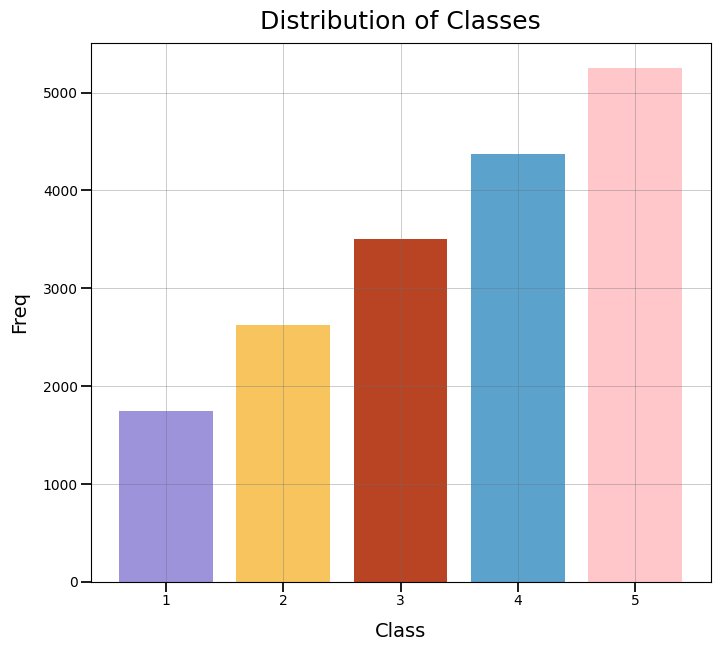

In [13]:
# Barplot of Class Distribution.

# Bar Color
colors = ["#9C93DB", "#F7C45E", "#B84423", "#5BA2CC", "#FFC7C9"]

fig, ax = plt.subplots(figsize = (8, 7))

ax.bar(x = data.target.unique(), height = heights, color = colors)

# Custom
ax.tick_params(direction='out', length = 7, width = 1.25 , colors='black',
                grid_color='black', grid_alpha= 0.5, pad = 2, labelsize = 10) # Custom ticks and ricks label major axis
ax.grid(visible = True, color='#65707A', linestyle='-', linewidth=0.5) # Add a grid for readability
ax.set_xticks(range(1,6))  # Custom ticks labels for x-axis

# Labels
ax.set_title("Distribution of Classes", size = 18, pad = 10)
ax.set_ylabel(r"Freq", labelpad=10, size = 14)
ax.set_xlabel(r"Class", labelpad = 10, size = 14)

plt.show()

Cris Modifications

In [14]:
from sklearn.model_selection import train_test_split

X = data.review
y = data.target

train_data, test_data, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state=14082001)

In [15]:
!pip install datasets evaluate transformers[sentencepiece]
!pip install accelerate
# To run the training on TPU, you will need to uncomment the following line:
# !pip install cloud-tpu-client==0.10 torch==1.9.0 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl
!apt install git-lfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 

In [16]:
!git config --global user.email "cris.hernandez1014@comunidad.unam.mx"
!git config --global user.name "Christian-F-Badillo"

In [17]:
train_data.reset_index(inplace=True, drop=True)
train_data = pd.DataFrame(train_data)
train_data

,review
0,"Muy buena atención de Nayla, Ruben y Adrian. ..."
1,Esta caminata exigente a través de la selva er...
2,El costo de la habitación por noche tan caro c...
3,Es un hotel que no vale lo que pagas: el servi...
4,un visita interesante para ver una partida de ...
...,...
13995,Estuve en La Habana 5 noches y estuve hospedad...
13996,Fue menos de lo que esperábamos pero es algo i...
13997,"Es una Zona Arqueológica gigante, se necesita ..."
13998,"Tuve un almuerzo en el restaurante, se podía v..."


In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("papluca/xlm-roberta-base-language-detection")

model = AutoModelForSequenceClassification.from_pretrained("papluca/xlm-roberta-base-language-detection")

In [19]:
roberta_num_parameters = model.num_parameters() / 1_000_000
print(f"'>>> BSC-TeMU/roberta-base-bne number of parameters: {round(roberta_num_parameters)}M'")

'>>> BSC-TeMU/roberta-base-bne number of parameters: 278M'


In [20]:
token = tokenizer.encode_plus(train_data.review[0], max_length = 256,
                              truncation = True, padding = "max_length",
                              add_special_tokens = True, return_token_type_ids = False,
                              return_attention_mask = True, return_tensors = "tf")
token

{'input_ids': <tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[     0, 147259,  26031,  23139,      8,    353,   7809,      4,
        153427,    113,  46932,      5,   3288,   1683,   3591,  43281,
           113,     88,   4487,    198,   3591, 108869,      5,   1371,
         22023,    191,     51,  32058, 126947,    196,  13130, 129270,
          1094,  21376,    196,   1973,     38,      2,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
  

In [21]:
Xids = np.zeros((len(train_data), 256))
Xmask = np.zeros((len(train_data), 256))

Xids.shape

(14000, 256)

In [22]:
train_data

,review
0,"Muy buena atención de Nayla, Ruben y Adrian. ..."
1,Esta caminata exigente a través de la selva er...
2,El costo de la habitación por noche tan caro c...
3,Es un hotel que no vale lo que pagas: el servi...
4,un visita interesante para ver una partida de ...
...,...
13995,Estuve en La Habana 5 noches y estuve hospedad...
13996,Fue menos de lo que esperábamos pero es algo i...
13997,"Es una Zona Arqueológica gigante, se necesita ..."
13998,"Tuve un almuerzo en el restaurante, se podía v..."


In [23]:
for i, seq in enumerate(train_data["review"]):
    tokens = tokenizer.encode_plus(seq, max_length = 256,
                              truncation = True, padding = "max_length",
                              add_special_tokens = True, return_token_type_ids = False,
                              return_attention_mask = True, return_tensors = "tf")
    Xids[i, :], Xmask[i, :] = tokens["input_ids"], tokens["attention_mask"]

In [24]:
Xids

array([[0.00000e+00, 1.47259e+05, 2.60310e+04, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 5.68500e+03, 1.60367e+05, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 5.40000e+02, 5.46880e+04, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       ...,
       [0.00000e+00, 1.18400e+03, 2.20000e+02, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 1.37100e+03, 2.72000e+02, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [0.00000e+00, 7.68000e+03, 3.83700e+04, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]])

In [38]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [43]:
arr = target_train.values
arr.size

14000

In [ ]:
arr

In [45]:
labels = np.zeros((arr.size, arr.max()+1))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [25]:
df = pd.DataFrame(train_data).reset_index(drop=True)
df

,review
0,"Muy buena atención de Nayla, Ruben y Adrian. ..."
1,Esta caminata exigente a través de la selva er...
2,El costo de la habitación por noche tan caro c...
3,Es un hotel que no vale lo que pagas: el servi...
4,un visita interesante para ver una partida de ...
...,...
13995,Estuve en La Habana 5 noches y estuve hospedad...
13996,Fue menos de lo que esperábamos pero es algo i...
13997,"Es una Zona Arqueológica gigante, se necesita ..."
13998,"Tuve un almuerzo en el restaurante, se podía v..."


In [26]:
from datasets import Dataset, load_dataset, DatasetDict

td = Dataset.from_pandas(df)
ds_dict = {'train' : td}
dataset = DatasetDict(ds_dict)
dataset

DatasetDict({
    train: Dataset({
        features: ['review'],
        num_rows: 14000
    })
})

In [27]:
def tokenize_function(examples):
    result = tokenizer(examples["review"])
    if tokenizer.is_fast:
        result["word_ids"] = [result.word_ids(i) for i in range(len(result["input_ids"]))]
    return result


# Use batched=True to activate fast multithreading!
tokenized_datasets = dataset.map(
    tokenize_function, batched=True, remove_columns=["review"]
)
tokenized_datasets

Map:   0%|          | 0/14000 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'word_ids'],
        num_rows: 14000
    })
})

In [28]:
tokenizer.model_max_length

512

In [29]:
chunk_size = 128

In [30]:
tokenized_samples = tokenized_datasets["train"][:3]

for idx, sample in enumerate(tokenized_samples["input_ids"]):
    print(f"'>>> Review {idx} longitud: {len(sample)}'")

'>>> Review 0 longitud: 38'
'>>> Review 1 longitud: 178'
'>>> Review 2 longitud: 70'


In [31]:
concatenated_examples = {
    k: sum(tokenized_samples[k], []) for k in tokenized_samples.keys()
}
total_length = len(concatenated_examples["input_ids"])
print(f"'>>> Longitud de reviews concatenados: {total_length}'")

'>>> Longitud de reviews concatenados: 286'


In [32]:
chunks = {
    k: [t[i : i + chunk_size] for i in range(0, total_length, chunk_size)]
    for k, t in concatenated_examples.items()
}

for chunk in chunks["input_ids"]:
    print(f"'>>> Chunk length: {len(chunk)}'")

'>>> Chunk length: 128'
'>>> Chunk length: 128'
'>>> Chunk length: 30'


In [33]:
def group_texts(examples):
    # Concatena todos los textos
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    # Calcula la longitud de los textos concatenados
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # Soltamos el último fragmento si es más pequeño que chunk_size
    total_length = (total_length // chunk_size) * chunk_size
    # Dividir por partes de max_len
    result = {
        k: [t[i : i + chunk_size] for i in range(0, total_length, chunk_size)]
        for k, t in concatenated_examples.items()
    }
    # Crear una nueva columna de etiquetas
    result["labels"] = result["input_ids"].copy()
    return result

In [34]:
lm_datasets = tokenized_datasets.map(group_texts, batched=True)
lm_datasets

Map:   0%|          | 0/14000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'word_ids', 'labels'],
        num_rows: 10768
    })
})

In [35]:
tokenizer.decode(lm_datasets["train"][1]["input_ids"])

'nadar en ríos de aguas cristalinas cada día, preciosas vistas y hermosas mariposas, mangos recoger de los árboles... Una gran experiencia. La comida era increíblemente buena y abundante. Frutas y dulces que cada pocas horas. Nuestro guía Cesar Ramirez estaba muy bien informado sobre el paisaje natural y la historia de la zona. Él y nuestro traductor Juan Diego fue genial!</s><s> El costo de la habitación por noche tan caro como si fuera París o Nueva York pero la calidad de las mismas por los suelos, los alimentos a niveles aceptables en el desayuno y básicos'

In [36]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)

In [37]:
samples = [lm_datasets["train"][i] for i in range(2)]
for sample in samples:
    _ = sample.pop("word_ids")

for chunk in data_collator(samples)["input_ids"]:
    print(f"\n'>>> {tokenizer.decode(chunk)}'")

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.



'>>> <s> Muy<mask> atención de Nayla,<mask> y Adrian.<mask>ida muy rica y el lugar es muy agradable. Tuvieron un excelente<mask> por nuestro aniversario :) gracias por todo!</s><s> Esta camina<mask> exigent<mask> a través de la selv<mask> era preciosa, un paisaje como<mask> he visto. La caminata es bastante exigente físicamente, especialmente durante los días de lluvia. Aconsejo llevar una carga muy claro, no hay mucha ropa<mask> en<mask> durante el día, ya que se ensucian bastante rápido. La opción de alquilar una mula para su equipo es también bastante<mask><mask> Aparte de eso,'

'>>> nadar<mask> ríos de Kijerumanis cristalinas cada día, preciosas<mask> y hermosas mariposas<mask> mangos recoger de los árboles... Una gran experiencia<mask> La<mask> era<mask>mente buena y<mask>. Frutas<mask> dulces que cada poca<mask><mask>. Nuestro guía Cesar Ramirez<mask> muy bien<mask> sobre el<mask> natural y la<mask> de<mask> zona. Él y nuestro traductor Juan Diego fue بقدر!</s><s> El costo de l